In [1]:
import pandas as pd
import gtfs_kit as gk
import matplotlib as mpl
import matplotlib.pyplot as plt
import helper #homemade function file helper.py
import numpy as np


In [2]:
feed = gk.feed.read_feed('../general_data_analytics.zip',dist_units="km")

In [3]:
routes = gk.routes.get_routes(feed)
stop_times = feed.get_stop_times()
trips = feed.get_trips()
stops = feed.get_stops()
shapes = feed.shapes
calendar_dates = feed.calendar_dates
calendar = feed.calendar

# Collecting year data

In [4]:
## Collecting all service date of trips on those days
year_calendar_dates = calendar_dates.loc[(calendar_dates['date'] >= '20220101') & 
                                    (calendar_dates['date'] <= '20230103') ]


In [5]:
year_calendar_dates

,service_id,date
19950,3233_224114,20220103
19951,3233_224114,20220104
19952,3233_224114,20220105
19953,3233_224114,20220107
19954,3233_224114,20220110
...,...,...
27915,4118_237648,20221230
27916,4118_237648,20221231
27917,4118_237648,20230101
27918,4118_237648,20230102


In [6]:
# Removing data outside the selected year 

## Creating new calendar and collect service date from previous new calendar_dates with drop duplicates
year_calendar = calendar.iloc[0:0]
service_id_list = list(dict.fromkeys(year_calendar_dates['service_id']))

for service_id in service_id_list:
    row  = calendar.loc[calendar['service_id'] == service_id]
    year_calendar = pd.concat([year_calendar, row],
                      ignore_index = True)

## Creating new trips dataframe and collect trips using the list of service id
year_trips = trips.iloc[0:0]

for service_id in service_id_list:
    row  = trips.loc[trips['service_id'] == service_id]
    year_trips = pd.concat([year_trips, row],
                      ignore_index = True)
    
## Creating list of shapes_id,route_id,trips_id from sw_trips
route_id_list = list(dict.fromkeys(year_trips['route_id']))
shape_id_list = list(dict.fromkeys(year_trips['shape_id']))
trip_id_list = list(dict.fromkeys(year_trips['trip_id']))

## Creating new route dataframe
year_routes = routes.iloc[0:0]

for route_id in route_id_list:
    row = routes.loc[routes['route_id']==route_id]
    year_routes = pd.concat([year_routes,row],ignore_index=True)

## Creating new shape dataframe
year_shapes = shapes.iloc[0:0]

for shape_id in shape_id_list:
    row = shapes.loc[shapes['shape_id']==shape_id]
    year_shapes = pd.concat([year_shapes, row],ignore_index = True)

## Creating new stop_times dataframe
year_stop_times = stop_times.iloc[0:0]

for trip_id in trip_id_list:
    row = stop_times.loc[stop_times['trip_id'] == trip_id]
    year_stop_times = pd.concat([year_stop_times,row],ignore_index = True)
stop_id_list = list(dict.fromkeys(year_stop_times['stop_id']))

## Creating new stop dataframe, should be equal at this point 
## but we do it for safe reasons
year_stops = stops.iloc[0:0]

for stop_id in stop_id_list:
    row = stops.loc[stops['stop_id']==stop_id]
    year_stops = pd.concat([year_stops,row],ignore_index = True)

# We performe data analytics on the year 20220


In [7]:
# Join the dataset for easy at use
year_analytics = year_trips
year_analytics = pd.merge(year_analytics, year_calendar_dates, on=['service_id','service_id'])
year_analytics = pd.merge(year_analytics, year_stop_times, on=['trip_id','trip_id'])
year_analytics = year_analytics.drop(['trip_headsign','direction_id','shape_id',
                                     'arrival_time', 'departure_time','shape_dist_traveled',
                                     'time_diff', 'speed', 'dist_diff','route_id'
                                     ], axis='columns')
year_analytics_save_copy = year_analytics.copy()

In [8]:
year_analytics = year_analytics.groupby(['trip_id','service_id','date']).max('stop_sequence').reset_index()

In [9]:
week_division_dates = helper.calendar_2022()

In [10]:
result = pd.DataFrame(columns=['corse_totali', 'corse_veloci', 'corse_medie', 'corse_lente'], index=range(len(week_division_dates)-1)).fillna(0)
result.index += 1

#REGOLARE NUMERI CLUSTERING (Veloci , Medi, Lenti)

for i in range(len(week_division_dates)-1):
    ## Collecting all service date of trips on those days
    temp_analytics = year_analytics.loc[(year_analytics['date'] >= week_division_dates[i]) &
                                       (year_analytics['date'] < week_division_dates[i+1])]
    for index, row  in temp_analytics.iterrows():
        result.at[i+1,'corse_totali'] += 1
        if(row.stop_sequence <= 5):
            result.at[i+1,'corse_veloci'] += 1
        if(row.stop_sequence > 5 and row.stop_sequence <= 10):
            result.at[i+1,'corse_medie'] += 1
        if(row.stop_sequence > 10):
            result.at[i+1,'corse_lente'] += 1

In [11]:
result.head(60)

,corse_totali,corse_veloci,corse_medie,corse_lente
1,392,183,60,149
2,437,196,73,168
3,437,196,73,168
4,437,196,73,168
5,437,196,73,168
6,437,196,73,168
7,437,196,73,168
8,437,196,73,168
9,437,196,73,168
10,437,196,73,168


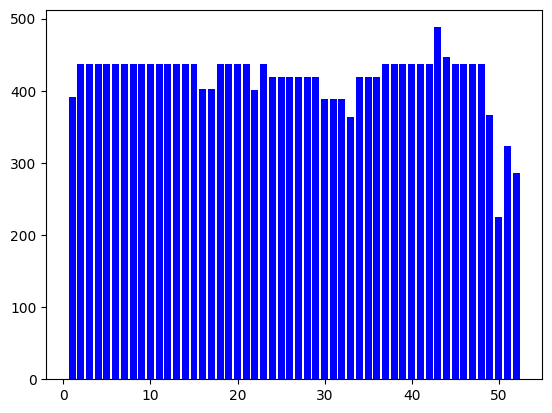

In [12]:
# Plot total 
plt.bar(result.index, result['corse_totali'], color='b')
plt.show()

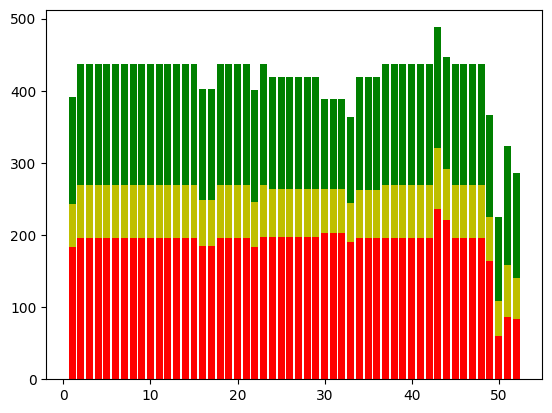

In [13]:
plt.bar(result.index, result['corse_veloci'], color='r')
plt.bar(result.index, result['corse_medie'], bottom=result['corse_veloci'], color='y')
plt.bar(result.index, result['corse_lente'],bottom=result['corse_veloci']+result['corse_medie'], color='g')
plt.show()

In [14]:
# Year scatter plot

In [15]:
#Calculating table
feed = gk.feed.read_feed('../feed_collection/20211214.gtfs',dist_units="km")
stop_times_year = feed.stop_times.copy()
# We create an empty column for time different, speed, distance 
stop_times_year = stop_times_year.assign(time_diff=None)
stop_times_year = stop_times_year.assign(speed=None)
stop_times_year = stop_times_year.assign(dist_diff=None)

# Calculating Distance, Time and avg Speed between last stop and current stop
for index, row  in stop_times_year.iterrows():
    if row['stop_sequence'] == 1:
        stop_times_year['time_diff'][index] = 0
        stop_times_year['dist_diff'][index] = 0
        stop_times_year['speed'][index] = 0
    else:
        time = helper.get_sec(row['arrival_time']) - helper.get_sec(stop_times_year.loc[index - 1,'departure_time'])
        distance = row['shape_dist_traveled'] - stop_times_year.loc[index-1,'shape_dist_traveled']
        stop_times_year['time_diff'][index] = (time / 3600)
        stop_times_year['dist_diff'][index] = distance 
        stop_times_year['speed'][index] = distance / (time / 3600) # Speed in km/h

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [16]:
df_analytics = helper.dataset_for_scatter_year(stop_times_year)



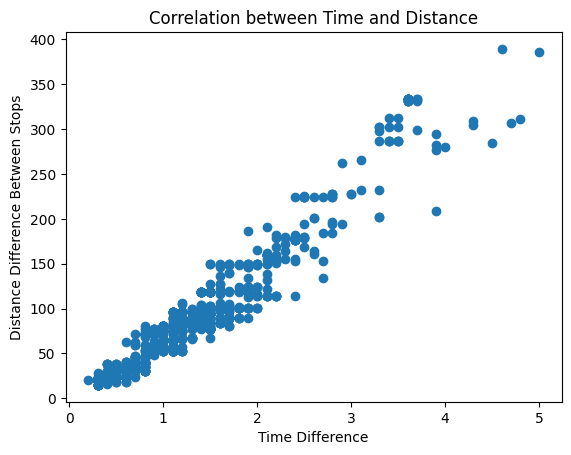

In [17]:
helper.scatter_time_distance(df_analytics)

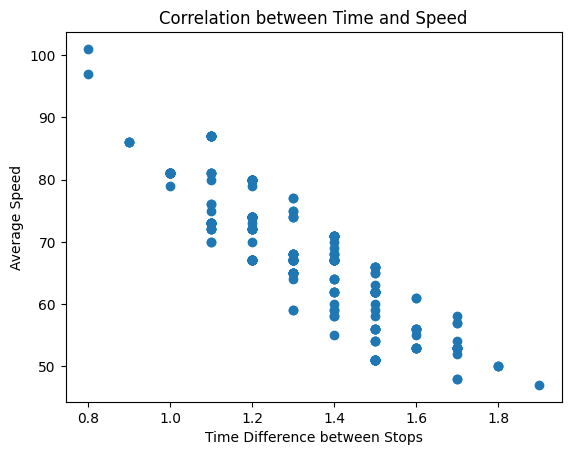

In [18]:
x = df_analytics.loc[((df_analytics['distance'] <= 100) & (df_analytics['distance'] >= 75))];
helper.scatter_time_speed(x)

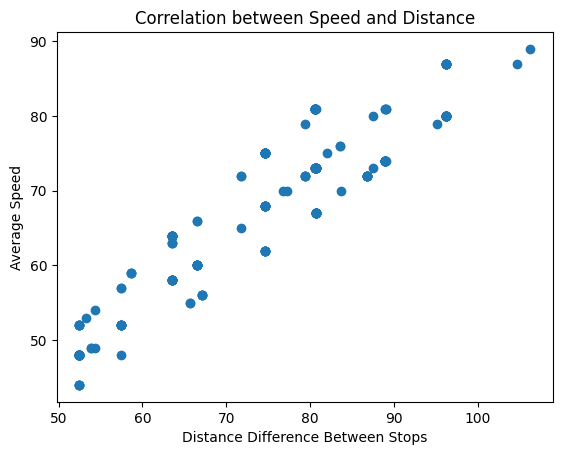

In [19]:
y = df_analytics.loc[((df_analytics['time'] <= 1.2) & (df_analytics['time'] >= 1.0))];
helper.scatter_speed_distance(y)